# Librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix

from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

from sklearn.ensemble import RandomForestClassifier

# Load DataSet

In [2]:
df = pd.read_csv('/Users/matteo/Desktop/Rakuten/Churn_DS_Dataset.csv')
df.head()

,customerID,Customer Title,Customer Birth Date,Came From Paid Acq?,# Months since first Purchase,InternetService,Has contacted CS,Has RakutenTV,PaymentMethod,Last Purchase Amount,Total Purchase Amount,Churn
0,7590-VHVEG,Ms,12/12/1967,Yes,1.0,NaN,Yes,No,Credit card,29.85,29.85,No
1,5575-GNVDE,Miss,09/09/1963,No,34.0,NaN,No,No,Credit card,56.95,1889.5,No
2,3668-QPYBK,Mr,10/22/1961,No,2.0,NaN,No,No,Bank transfer (automatic),53.85,108.15,Yes
3,7795-CFOCW,Miss,01/09/1978,No,45.0,NaN,Banana,No,Credit card,42.30,1840.75,No
4,9237-HQITU,Mr,01/12/1979,No,2.0,DSL,No,No,Credit card,70.70,151.65,Yes


In [3]:
print("Length of df ",len(df))

print("No duplicates on customerID",len(df.drop_duplicates(subset=['customerID'])),"\n")

print("Sum Na in Columns \n",df.isna().sum())

Length of df  7043
No duplicates on customerID 7043 

Sum Na in Columns 
 customerID                          0
Customer Title                      0
Customer Birth Date                 0
Came From Paid Acq?                 0
# Months since first Purchase       0
InternetService                  5221
Has contacted CS                  480
Has RakutenTV                       0
PaymentMethod                     250
Last Purchase Amount                0
Total Purchase Amount               0
Churn                               0
dtype: int64


# Creation Age Variable

In [4]:
# Function to substract Today's date and Birth Date 
def age(born):
    born = datetime.strptime(born, "%m/%d/%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month,born.day))
  
df['Age'] = df['Customer Birth Date'].apply(age)

df.head(3)

,customerID,Customer Title,Customer Birth Date,Came From Paid Acq?,# Months since first Purchase,InternetService,Has contacted CS,Has RakutenTV,PaymentMethod,Last Purchase Amount,Total Purchase Amount,Churn,Age
0,7590-VHVEG,Ms,12/12/1967,Yes,1.0,NaN,Yes,No,Credit card,29.85,29.85,No,54
1,5575-GNVDE,Miss,09/09/1963,No,34.0,NaN,No,No,Credit card,56.95,1889.5,No,58
2,3668-QPYBK,Mr,10/22/1961,No,2.0,NaN,No,No,Bank transfer (automatic),53.85,108.15,Yes,60


# Remove not important Columns

In [5]:
#Customer Birth Date can be deleted because we juste created the Age Column
#Internet Service -> we delete it (because too many Na / can't be used)
#Customer Id not important (Since All ID are uniques)

df1 = df.drop(columns = ["customerID","Customer Birth Date", "InternetService"])
df1.columns

Index(['Customer Title', 'Came From Paid Acq?',
       '# Months since first Purchase', 'Has contacted CS', 'Has RakutenTV',
       'PaymentMethod', 'Last Purchase Amount', 'Total Purchase Amount',
       'Churn', 'Age'],
      dtype='object')

# Distribution of  Various Columns (Categorical Variables)

Text(0.5, 1.0, 'Répartition des Churn')

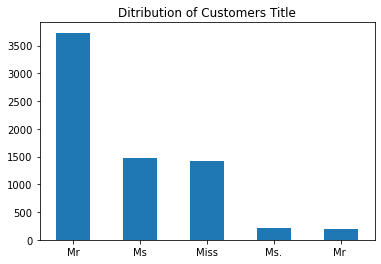

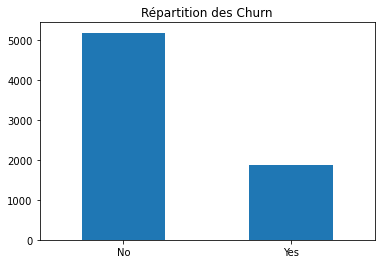

In [6]:
# Value Counts for each type of Customer Title
# We observe different Titles that are in reality the Same MS=Miss=Ms. / Mr # Mr in our Data Set
df_title = df1["Customer Title"].value_counts()
ax = df_title.plot.bar(rot=0)
plt.title("Ditribution of Customers Title")

# Way less Churn than no Churn
fig, axs = plt.subplots()
df1['Churn'].value_counts().plot.bar(rot=0)
plt.title("Répartition des Churn")

Number of undefined CS (Banana) : 176


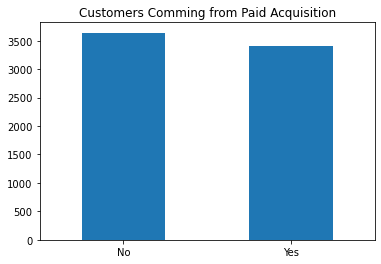

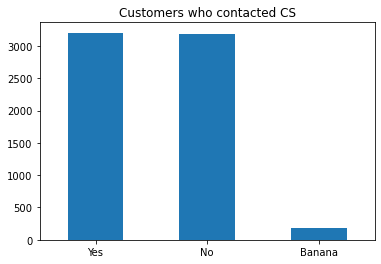

In [7]:
# Half Customers Comming from Paid ACQ
df_Paid_ACQ = df1["Came From Paid Acq?"].value_counts()
ax = df_Paid_ACQ.plot.bar(rot=0)
plt.title("Customers Comming from Paid Acquisition")

# Half Customers has contacted CS
# Variable not identified (Banana) -> I am going to remove those rows
fig, axs = plt.subplots()
df1['Has contacted CS'].value_counts().plot.bar(rot=0)
plt.title("Customers who contacted CS")

print("Number of undefined CS (Banana) :",len(df1[df1["Has contacted CS"] == "Banana"]))

Text(0.5, 1.0, 'Different Methods of Customer Payments')

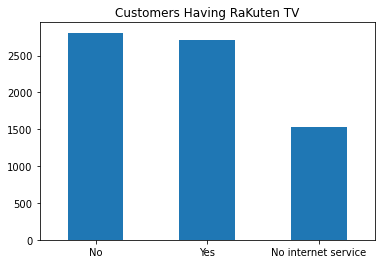

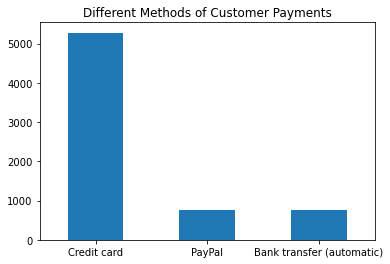

In [8]:
# ~ Same Number of Customers With & Without Rakuten TV
# Unidentified category "No internet Service"
df_RakutenTV = df1["Has RakutenTV"].value_counts()
ax = df_RakutenTV.plot.bar(rot=0)
plt.title("Customers Having RaKuten TV")



# Customers usually pay with Credit Cards
# 250 Missing Values -> we transform Na to Credit Cards (because it is the Most Used Payment)

fig, axs = plt.subplots()
df1['PaymentMethod'].value_counts().plot.bar(rot=0)
plt.title("Different Methods of Customer Payments")


# Distributions of Numerical Variables

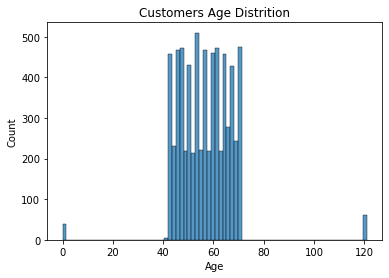

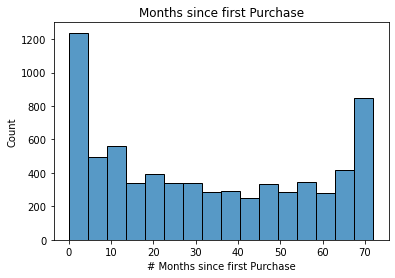

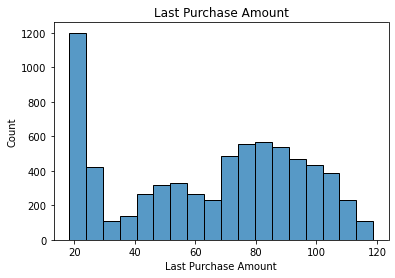

In [9]:
# we detect outliers (0,120 years old) -> we are going to remove those outliers ~75 rows manually
sns.histplot(df1['Age'])
plt.title("Customers Age Distrition")
plt.show()


sns.histplot(df1['# Months since first Purchase'])
plt.title("Months since first Purchase")
plt.show()

# More little expense than big expense
sns.histplot(df1['Last Purchase Amount'])
plt.title("Last Purchase Amount")
plt.show()

# Changing Genders variables

Different type of categories {'Mr', 'Ms', 'Ms.', 'Miss', 'Mr '} 



Text(0.5, 1.0, 'Ditribution of Customers Title')

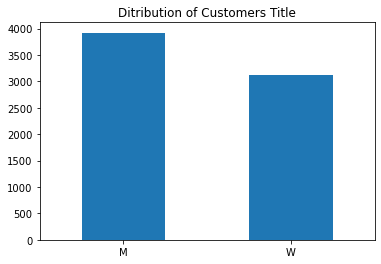

In [10]:
print("Different type of categories",set(list(df1["Customer Title"])),"\n")

# Replace Categories inside genders
df1["Gender"] =df1["Customer Title"].replace({'Miss': "W" , 'Mr': "M", 'Mr ': 'M','Ms': "W" ,'Ms.': "W" })
df1 = df1.drop(columns = ["Customer Title"])

df_Gender = df1["Gender"].value_counts()
ax = df_Gender.plot.bar(rot=0)
plt.title("Ditribution of Customers Title")

# Delete Age Outliers

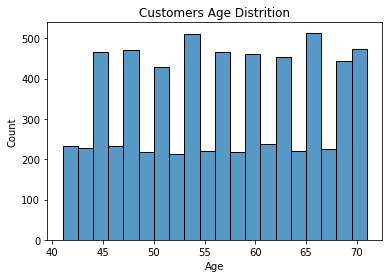

In [11]:
# Age filter 

df2 = df1[df1["Age"] > 13]
df2 = df2[df2["Age"] < 90]

# Histplot Age without outliers
sns.histplot(df2['Age'])
plt.title("Customers Age Distrition")
plt.show()

# Remove Bananas in CS & Changing NA payments to Cards payment

In [12]:
# We chose to fill Na by No (because we might have a trace otherwise)

df2["Has contacted CS"] = df2["Has contacted CS"].fillna("No")

# We chose to replace Banana by Yes (maybe make sence because something has been reported)
df2["Has contacted CS"] = df2["Has contacted CS"].replace({"Banana":"Yes"})

# Converting Na to Credit Card
df2["PaymentMethod"] = df2["PaymentMethod"].fillna("Credit card")

# Creation of First Purshase variable 

In [13]:
# There are white spaces Values in column : Total Purchase Amount
def isfloat(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

df2['Tot Purshas Float (Bool)'] = df2['Total Purchase Amount'].apply(isfloat)
df2 = df2[df2["Tot Purshas Float (Bool)"]!= False] # We remove rows with with spaces ~ 15 


In [14]:
# We convert the "Total Purchase Amount" and "Last Purchase Amount to Float"

df2["Total Purchase Amount"] = df2["Total Purchase Amount"].astype("float64")
df2["Last Purchase Amount"] = df2["Last Purchase Amount"].astype("float64")

In [15]:
# Simple substraction between two columns
df2["Difference"] = df2["Total Purchase Amount"].astype("float64") - df2["Last Purchase Amount"].astype("float64")

# If the Difference equal 0 means user only make 1 purshase else more than One (we transform in Binary)
def firstpurshase(value):
    if value>0:
        return ("No")
    else:
        return ("Yes")

# We apply our function above
df2["First Purshase"] = df2["Difference"].apply(firstpurshase)

# we remove columns not needed
df3 = df2.drop(columns = ["Tot Purshas Float (Bool)","Difference"])

df3.head()

,Came From Paid Acq?,# Months since first Purchase,Has contacted CS,Has RakutenTV,PaymentMethod,Last Purchase Amount,Total Purchase Amount,Churn,Age,Gender,First Purshase
0,Yes,1.0,Yes,No,Credit card,29.85,29.85,No,54,W,Yes
1,No,34.0,No,No,Credit card,56.95,1889.50,No,58,W,No
2,No,2.0,No,No,Bank transfer (automatic),53.85,108.15,Yes,60,M,No
3,No,45.0,Yes,No,Credit card,42.30,1840.75,No,43,W,No
4,No,2.0,No,No,Credit card,70.70,151.65,Yes,42,M,No


# Better Graph = Pie Chart Graph

Text(0.5, 1.0, 'First Purshase Custommers')

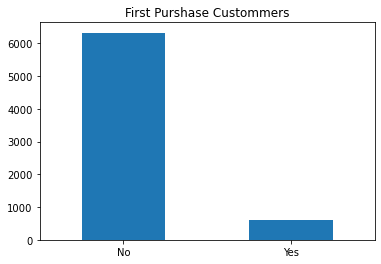

In [16]:
# For most of the customers it is not their first purshase

df_first_purchase = df3["First Purshase"].value_counts()
ax = df_first_purchase.plot.bar(rot=0)
plt.title("First Purshase Custommers")

Yes    379
No     230
Name: Churn, dtype: int64


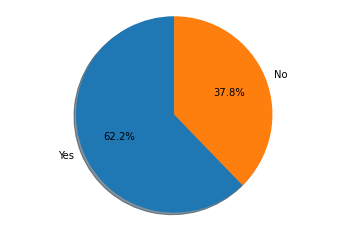

In [17]:
# here i m trying to determine if customers who made only one purshase churn just after
# we can observe that Customers making only one Purshase churn in 62.2% of the cases this is a lot
# idea : improve the loyalty program of the first purshase for new customers

df_first_purshase_1 = df3[df3["First Purshase"] == "Yes"]

print(df_first_purshase_1["Churn"].value_counts())

fig1, ax1 = plt.subplots()
ax1.pie(df_first_purshase_1["Churn"].value_counts(), labels=["Yes",'No'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

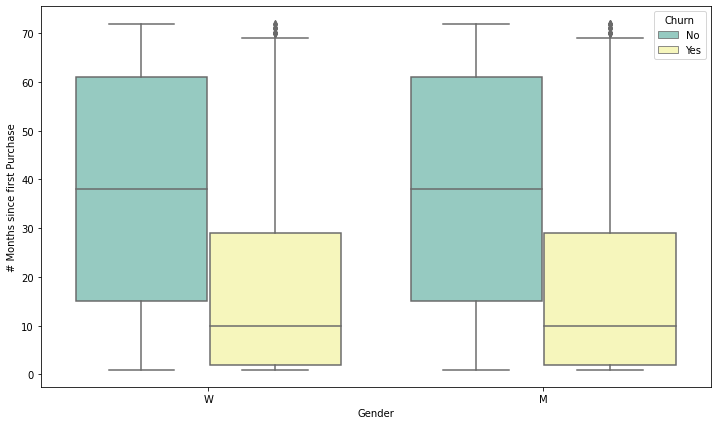

In [18]:
# Half of churning customers is in the first 10 months for both genders
# Maybe offer them personlyse promotions to avoid churning.
# no disparity between genders
plt.figure(figsize=(12, 7))
ax = sns.boxplot(x="Gender", y="# Months since first Purchase", hue="Churn",data=df3, palette="Set3")

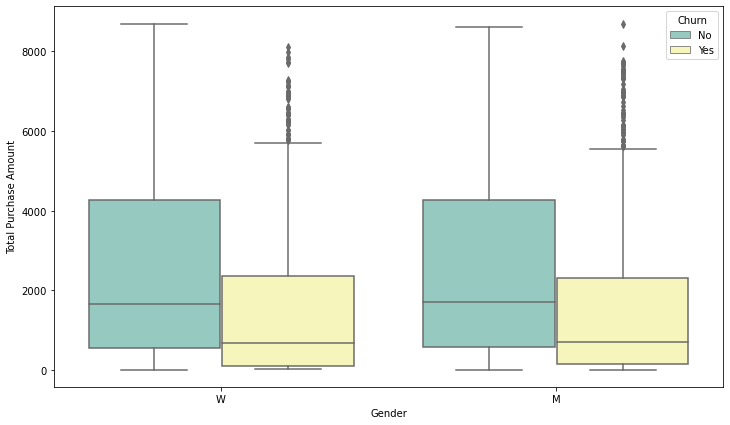

In [19]:
# For both churning genders : they spend less money on the platform ~300 
# ~ 20 % of churning customers spend a least 1500 euros (if it is not their fist purschase they might be disappointed with the delivery)
# we could see if churnig customers that spend more money has contacted the Custommer Service (hypothese) and then maybe get the sentiment analysis of the message delivred to CS

plt.figure(figsize=(12, 7))
ax = sns.boxplot(x="Gender", y="Total Purchase Amount", hue="Churn",data=df3, palette="Set3")

# Replace Catégotrical variables

In [20]:
# Replace in concerned Columns No by 0 and Yes by 1

df3['Churn'] = df3['Churn'].replace({'No': 0 , 'Yes': 1})
df3['Has contacted CS'] = df3['Has contacted CS'].replace({'No': 0 , 'Yes': 1})
df3['Has RakutenTV'] = df3['Has RakutenTV'].replace({'No': 0 , 'Yes': 1, 'No internet service': 2})
df3['Came From Paid Acq?'] = df3['Came From Paid Acq?'].replace({'No': 0 , 'Yes': 1})
df3['Gender'] = df3['Gender'].replace({'M': 0 , 'W': 1})
df3['First Purshase'] = df3['First Purshase'].replace({'No': 0 , 'Yes': 1})
df3["Has contacted CS"]= df3["Has contacted CS"].replace({'No': 0 , 'Yes': 1})

In [21]:
# One hot encoder -> transform different categories into numbers 0,1,2
encoder = LabelEncoder()
df3["PaymentMethod"] = encoder.fit_transform(df3["PaymentMethod"])

In [22]:
df3.head()

,Came From Paid Acq?,# Months since first Purchase,Has contacted CS,Has RakutenTV,PaymentMethod,Last Purchase Amount,Total Purchase Amount,Churn,Age,Gender,First Purshase
0,1,1.0,1,0,1,29.85,29.85,0,54,1,1
1,0,34.0,0,0,1,56.95,1889.50,0,58,1,0
2,0,2.0,0,0,0,53.85,108.15,1,60,0,0
3,0,45.0,1,0,1,42.30,1840.75,0,43,1,0
4,0,2.0,0,0,1,70.70,151.65,1,42,0,0


# Correlation Matrix 

In [23]:
# Negative correlation between :
       #Churn <-> Months since first Purchase , Churn <-> Has Rakuten TV
       #Last Purshase Amount <->  Has RakutenTV
       #First Purshase <-> Came From Paid Acq, First Purshase <->  Months since first Purchase, First Purshase <-> Has Rakuten Tv

# Positive Correlations 
        # Came From Paid Acq <-> Month Since first Purshase
        # Last Purshase amount <-> Month Since first Purshase, 
        # First Purshase <-> Churn
        
# Big Positive Correlations
        # Total Purchase Amount <-> Month Since First Purshase ( logic more time we spend on Rakuten more we spend)
        #  Total Purchase Amount <-> Last Purchase Amount ( maybe because many customers leave after their first purchase)

corr = df3.corr()
corr.style.background_gradient(cmap='coolwarm')
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

/var/folders/vs/v4q4q5m97150k7z9stfc86l80000gn/T/ipykernel_14706/3892428467.py:20: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  (corr


,Came From Paid Acq?,# Months since first Purchase,Has contacted CS,Has RakutenTV,PaymentMethod,Last Purchase Amount,Total Purchase Amount,Churn,Age,Gender,First Purshase
Came From Paid Acq?,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
# Months since first Purchase,0.38,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Has contacted CS,0.00,-0.01,nan,nan,nan,nan,nan,nan,nan,nan,nan
Has RakutenTV,0.08,0.14,-0.02,nan,nan,nan,nan,nan,nan,nan,nan
PaymentMethod,0.02,0.00,0.01,0.00,nan,nan,nan,nan,nan,nan,nan
Last Purchase Amount,0.10,0.24,0.02,-0.42,0.01,nan,nan,nan,nan,nan,nan
Total Purchase Amount,0.32,0.83,0.01,-0.08,0.01,0.65,nan,nan,nan,nan,nan
Churn,-0.15,-0.35,0.03,-0.21,-0.00,0.19,-0.20,nan,nan,nan,nan
Age,-0.00,0.01,0.01,-0.00,0.00,-0.00,0.00,0.02,nan,nan,nan
Gender,0.00,-0.00,0.01,0.00,0.01,0.01,0.00,0.00,0.02,nan,nan


# Logistic Regression with all columns

In [24]:
df3_v1 = df3.drop(["Churn"], axis=1)


X = df3_v1.values # features
y = df3.Churn # target

# initialize test size to 10%
X_train, X_test, Y_train, Y_test = train_test_split( X, y, test_size=0.1, random_state=0)

#Create an object called regressor in the LinearRegression class…
regressor = LogisticRegression(random_state=0, max_iter = 150)

#Fit the linear regression model to the training set
regressor.fit(X_train,Y_train)

# Predict the Test set results:
y_pred= regressor.predict(X_test)

In [25]:
# First we create an evaluation function to output all the needs metrics

def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds, average='micro')
    recall = recall_score(y_true, y_preds, average='micro')
    f1 = f1_score(y_true, y_preds, average='micro')
    metric_dict = {"accuracy": round(accuracy, 4),
                   "precision": round(precision, 4),
                   "recall": round(recall, 4),
                   "f1": round(f1, 4)}
    
    return metric_dict


def print_stat(dico):
    for ele in dico.items():
        print(ele[0],":", round(ele[1]*100,4),"%")


In [26]:
# call the above functions.
print_stat(evaluate_preds(Y_test,y_pred))

accuracy : 78.67 %
precision : 78.67 %
recall : 78.67 %
f1 : 78.67 %


In [27]:
# creation of a Classification report

print(classification_report(Y_test, y_pred, target_names=['No','Yes']))

              precision    recall  f1-score   support

          No       0.81      0.91      0.86       496
         Yes       0.68      0.48      0.56       198

    accuracy                           0.79       694
   macro avg       0.75      0.69      0.71       694
weighted avg       0.78      0.79      0.77       694



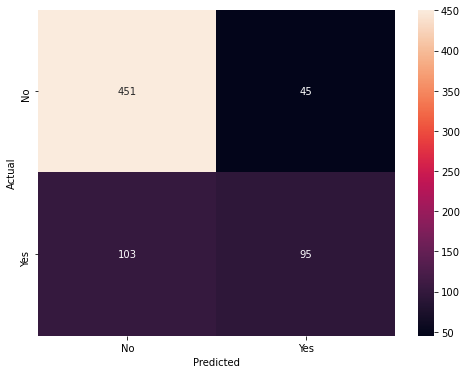

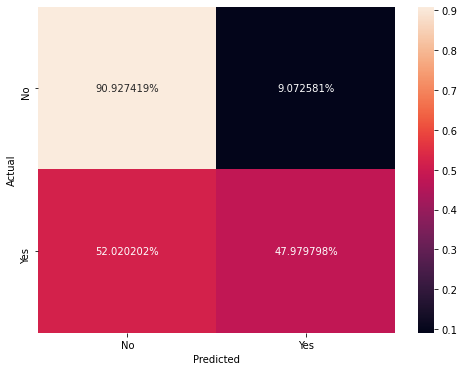

In [28]:
# Confusion Matrices

#Confusion Matrix With numbers 
conf_mat = confusion_matrix(Y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# Confusion Matrix with percentages (better than the other one)
cm = confusion_matrix(Y_test, y_pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cmn, annot=True, fmt='%',xticklabels=['No','Yes'], yticklabels=['No','Yes'])

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Logist Regression with Less columns (cf Correlation Matrix)

In [29]:
# we remove columns we dont need ( cf correlation matrix)
df4 = df3.drop(["Has contacted CS","PaymentMethod","Age","Gender"],axis=1)

# same as before
df4_v1 = df4.drop(["Churn"], axis=1)
X_2 = df4_v1.values
y_2 = df4.Churn

X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split( X_2, y_2, test_size=0.1, random_state=0)

#Create an object called regressor in the LinearRegression class…

regressor_2 = LogisticRegression(random_state=0, max_iter = 150)

#Fit the linear regression model to the training set
regressor_2.fit(X_train_2,Y_train_2)

# Predict test result:
y_pred_2= regressor_2.predict(X_test_2)


# we just improved by ~0.25% the model by selecting the most important features

print_stat(evaluate_preds(Y_test_2,y_pred_2))

# I won't perform correlation matrices (it is almost the same as before, because very small changes)

accuracy : 79.54 %
precision : 79.54 %
recall : 79.54 %
f1 : 79.54 %


# Random Forest

In [30]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

clf.fit(X_train, Y_train)

ypredict_clf = clf.predict(X_test)

print_stat(evaluate_preds(Y_test,ypredict_clf))

# accuracy 75.36 % -> less accurate than logistic regression

# Creation of a Classification report

print("\n",classification_report(Y_test, ypredict_clf, 
                                    target_names=['No','Yes']))

accuracy : 75.36 %
precision : 75.36 %
recall : 75.36 %
f1 : 75.36 %

               precision    recall  f1-score   support

          No       0.75      1.00      0.85       496
         Yes       0.94      0.15      0.25       198

    accuracy                           0.75       694
   macro avg       0.84      0.57      0.55       694
weighted avg       0.80      0.75      0.68       694



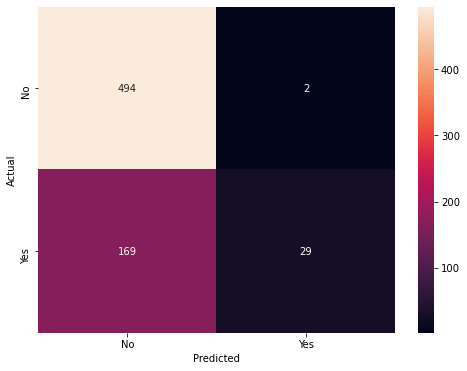

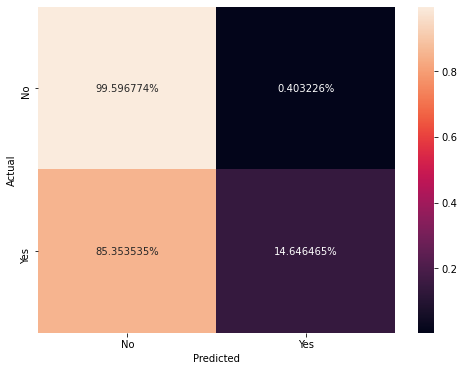

In [31]:
conf_mat = confusion_matrix(Y_test, ypredict_clf)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Confusion Matrix with percentages
cm = confusion_matrix(Y_test, ypredict_clf)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cmn, annot=True, fmt='%',xticklabels=['No','Yes'], yticklabels=['No','Yes'])

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# compare to logist regression, RF performs better in prediction : No Churn it is almost perfect

# But we are much less good at predicting churning customers
# Let us see how can we improve our Random forest (by finding the best parameters)

# Fine Tuning of the Random Forest Model on the max_depth parameters on the wall dataset

In [32]:
#generate a list of possible depth parameters
list_max_depth_rf = [i/10 for i in range(20, 150, 5)]

# here we evaluate many different max_depth parameters in order to choose the best one
list_resultat_rf = []
for depth in list_max_depth_rf:
    clf = RandomForestClassifier(max_depth=depth, random_state=0)
    clf.fit(X_train, Y_train)
    ypredict_clf = clf.predict(X_test)
    resultat = evaluate_preds(Y_test,ypredict_clf)
    list_resultat_rf.append(resultat)


list_resultat_rf

[{'accuracy': 0.7536, 'precision': 0.7536, 'recall': 0.7536, 'f1': 0.7536},
 {'accuracy': 0.7536, 'precision': 0.7536, 'recall': 0.7536, 'f1': 0.7536},
 {'accuracy': 0.7723, 'precision': 0.7723, 'recall': 0.7723, 'f1': 0.7723},
 {'accuracy': 0.7723, 'precision': 0.7723, 'recall': 0.7723, 'f1': 0.7723},
 {'accuracy': 0.7911, 'precision': 0.7911, 'recall': 0.7911, 'f1': 0.7911},
 {'accuracy': 0.7911, 'precision': 0.7911, 'recall': 0.7911, 'f1': 0.7911},
 {'accuracy': 0.7824, 'precision': 0.7824, 'recall': 0.7824, 'f1': 0.7824},
 {'accuracy': 0.7824, 'precision': 0.7824, 'recall': 0.7824, 'f1': 0.7824},
 {'accuracy': 0.7896, 'precision': 0.7896, 'recall': 0.7896, 'f1': 0.7896},
 {'accuracy': 0.7896, 'precision': 0.7896, 'recall': 0.7896, 'f1': 0.7896},
 {'accuracy': 0.7824, 'precision': 0.7824, 'recall': 0.7824, 'f1': 0.7824},
 {'accuracy': 0.7824, 'precision': 0.7824, 'recall': 0.7824, 'f1': 0.7824},
 {'accuracy': 0.7839, 'precision': 0.7839, 'recall': 0.7839, 'f1': 0.7839},
 {'accuracy'

In [33]:
# we select the best accuracy
max_parameter_rf =  max([element['accuracy'] for element in list_resultat_rf])

print("Best accuracy : ",max_parameter_rf)

# We take the index of the max accuracy to find after what is the max_depth
for i in range(0, len(list_resultat_rf)):
    if(list_resultat_rf[i]['accuracy'] == max_parameter_rf):
        num_rf = i
        break
        
print("Meilleur max_depth : ", list_max_depth_rf[num_rf])

Best accuracy :  0.7911
Meilleur max_depth :  4.0


accuracy : 79.11 %
precision : 79.11 %
recall : 79.11 %
f1 : 79.11 %


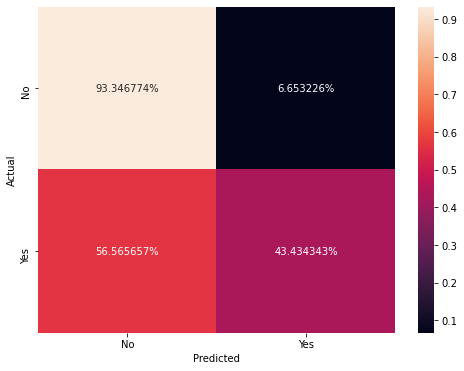

In [34]:
# We re run our Model with the max_depth

clf_best = RandomForestClassifier(max_depth=list_max_depth_rf[num_rf], random_state=0)
clf_best.fit(X_train, Y_train)
y_predict_clf_best = clf_best.predict(X_test)

# we improve our model by ~4%
print_stat(evaluate_preds(Y_test,y_predict_clf_best))

# Confusion Matrix with percentages
# we obtain way better results but not better as our first model -> logistic regression (RF 43% of Churning customers predicted)
cm = confusion_matrix(Y_test, y_predict_clf_best)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cmn, annot=True, fmt='%',xticklabels=['No','Yes'], yticklabels=['No','Yes'])

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Fine Tuning of the R.F model on the random_state parameter

In [35]:
#list with int between 0 and 10
list_random_state_rf = [i for i in range(0,11)]

# run the model multiples times (11) to find the best random parameter
list_resultat_rf2 = []
for random in list_random_state_rf:
    clf = RandomForestClassifier(max_depth=4, random_state=random)
    clf.fit(X_train, Y_train)
    ypredict_clf = clf.predict(X_test)
    resultat = evaluate_preds(Y_test,ypredict_clf)
    list_resultat_rf2.append(resultat)
    
list_resultat_rf2

[{'accuracy': 0.7911, 'precision': 0.7911, 'recall': 0.7911, 'f1': 0.7911},
 {'accuracy': 0.7911, 'precision': 0.7911, 'recall': 0.7911, 'f1': 0.7911},
 {'accuracy': 0.7896, 'precision': 0.7896, 'recall': 0.7896, 'f1': 0.7896},
 {'accuracy': 0.7911, 'precision': 0.7911, 'recall': 0.7911, 'f1': 0.7911},
 {'accuracy': 0.7968, 'precision': 0.7968, 'recall': 0.7968, 'f1': 0.7968},
 {'accuracy': 0.7839, 'precision': 0.7839, 'recall': 0.7839, 'f1': 0.7839},
 {'accuracy': 0.7867, 'precision': 0.7867, 'recall': 0.7867, 'f1': 0.7867},
 {'accuracy': 0.7911, 'precision': 0.7911, 'recall': 0.7911, 'f1': 0.7911},
 {'accuracy': 0.7882, 'precision': 0.7882, 'recall': 0.7882, 'f1': 0.7882},
 {'accuracy': 0.7939, 'precision': 0.7939, 'recall': 0.7939, 'f1': 0.7939},
 {'accuracy': 0.7853, 'precision': 0.7853, 'recall': 0.7853, 'f1': 0.7853}]

In [36]:
# we select the best accuracy

max_parameter_rf_2 =  max([element['accuracy'] for element in list_resultat_rf2])
print("Best accuracy : ",max_parameter_rf)

# We take the index of the max accuracy to find after what is the random para
for i in range(0, len(list_resultat_rf2)):
    if(list_resultat_rf2[i]['accuracy'] == max_parameter_rf_2):
        num_rf2 = i
        break
        
print("Meilleur random_state : ", list_random_state_rf[num_rf2])

Best accuracy :  0.7911
Meilleur random_state :  4


In [37]:
# we re-run the R.F with the best parameters at each time

clf_best_v2 = RandomForestClassifier(max_depth=list_max_depth_rf[num_rf], random_state=list_random_state_rf[num_rf2])
clf_best_v2.fit(X_train, Y_train)
y_predict_clf_best_v2 = clf_best_v2.predict(X_test)

print_stat(evaluate_preds(Y_test,y_predict_clf_best_v2))

# we gaing in accurary again by changing the parameters

accuracy : 79.68 %
precision : 79.68 %
recall : 79.68 %
f1 : 79.68 %


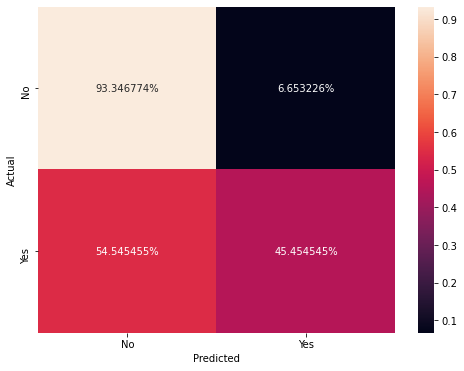

In [38]:
# Confusion Matrix with percentages
# we obtain better results but not better as our logist regression model(45.45% of Churning customers predicted)
cm = confusion_matrix(Y_test, y_predict_clf_best_v2)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cmn, annot=True, fmt='%',xticklabels=['No','Yes'], yticklabels=['No','Yes'])

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [39]:
# Conlclusion des modèles :

# Logistic regression et RF performent presque pareil sauf que le RF à plus de mal à prédire le churn des customers
# Mieux de prendre Logistic regression car beaucoup d'analyses peuvent être faites pour comprendre les résultats
# alors que RF très compliqué de comprendre pourquoi il se trompe 

# De plus avec la logistic regression les résultats sont meilleurs pour prédire le churn (cf confusion matrix pour actual/pred Yes Churn)

# J'ai aussi essayé un Neural Network qui donnait ~ 77 % d'accuracy, je ne te le montre pas car je ne le comprends pas tous les paramètres

# Un autre model qui pourrait être fait est un SVM ( fort pour la classification)

# Neural Network

In [40]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

In [41]:
model = Sequential()
model.add(Dense(30, activation='relu', input_shape=(X_train[0].shape)))
model.add(Dense(20,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

2021-12-27 15:38:10.753830: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2021-12-27 15:38:10.772726: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7feb172bb390 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-12-27 15:38:10.772772: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


In [42]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=35, 
          validation_split=0.25)

Epoch 1/35
147/147 [==============================] - 0s 2ms/step - loss: 55.4492 - accuracy: 0.5556 - val_loss: 0.9028 - val_accuracy: 0.7045
Epoch 2/35
147/147 [==============================] - 0s 1ms/step - loss: 0.8436 - accuracy: 0.7118 - val_loss: 1.4147 - val_accuracy: 0.7667
Epoch 3/35
147/147 [==============================] - 0s 1ms/step - loss: 0.9470 - accuracy: 0.7215 - val_loss: 1.2650 - val_accuracy: 0.7583
Epoch 4/35
147/147 [==============================] - 0s 1ms/step - loss: 1.2381 - accuracy: 0.7328 - val_loss: 0.6594 - val_accuracy: 0.6410
Epoch 5/35
147/147 [==============================] - 0s 1ms/step - loss: 0.9264 - accuracy: 0.7324 - val_loss: 0.5530 - val_accuracy: 0.7647
Epoch 6/35
147/147 [==============================] - 0s 1ms/step - loss: 1.2153 - accuracy: 0.7253 - val_loss: 1.8238 - val_accuracy: 0.7577
Epoch 7/35
147/147 [==============================] - 0s 1ms/step - loss: 1.4141 - accuracy: 0.7277 - val_loss: 0.7182 - val_accuracy: 0.6244
Epoch

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                330       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 971
Trainable params: 971
Non-trainable params: 0
_________________________________________________________________


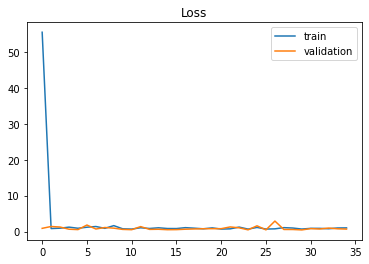

In [44]:
plt.title('Loss')
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.legend()
plt.show()

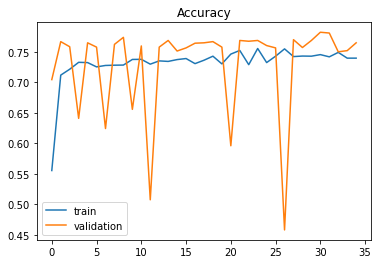

In [45]:
plt.title('Accuracy')
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='validation')
plt.legend()
plt.show()